In [19]:
#Importando a biblioteca
import pandas as pd

In [20]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [21]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [22]:
#vendo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [23]:
#vendo as 5 ultimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [9]:
#pega amostra de x quantidade de linhas
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
88,Recife,2019-01-01,180.24,980,6
115,Fortaleza,2019-03-02,12.23,981,3
121,Recife,2019-03-02,41.55,981,3
3,Recife,2019-02-10,160.54,981,3
205,Salvador,2019-01-02,196.09,1037,1
108,Fortaleza,2019-03-02,152.89,981,4
136,Recife,2019-03-02,39.09,982,4
74,Recife,2019-01-01,38.79,983,6
61,Aracaju,2018-01-01,39.80,1520,6
121,Salvador,2019-03-02,100.70,1037,3


In [24]:
#verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [25]:
#alterando o tipo de dado da coluna
df["LojaID"] = df["LojaID"].astype("object")

In [38]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [15]:
#consultando linha com fatores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
#substituindo valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [16]:
#substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [17]:
#Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [18]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com os valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [28]:
#criando coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [29]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [31]:
#retornando a maior receita
df["Receita"].max()

3544.0

In [32]:
#retornando a menor receita
df["Receita"].min()

3.34

In [33]:
#nlargest (baseado nas planilhas utilizadas, traz as 3 lojas com maiores receitas)
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [34]:
#nlargest (baseado nas planilhas utilizadas, traz as 3 lojas com menores receitas)
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [35]:
#agrupamento de receita por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [36]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


**Trabalhando com datas**

In [ ]:
#transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

In [39]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [40]:
#transformando coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [41]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [42]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [43]:
#criando uma nova coluna com o ano
df["Ano_Venda"] = df["Data"].dt.year

In [44]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
137,Recife,2019-03-02,51.99,983,3,155.97,2019
23,Fortaleza,2019-01-01,85.90,1004,5,429.50,2019
39,Salvador,2019-01-01,165.95,1036,3,497.85,2019
3,Salvador,2019-02-10,176.34,1037,3,529.02,2019
53,Salvador,2019-01-01,39.50,1035,3,118.50,2019
129,Aracaju,2018-01-01,13.70,1522,6,82.20,2018
138,Natal,2019-01-02,212.03,1037,3,636.09,2019
96,Natal,2019-01-02,42.94,1034,3,128.82,2019
120,Aracaju,2018-01-01,7.73,1520,10,77.30,2018
224,Salvador,2019-01-02,178.30,1035,3,534.90,2019


In [46]:
#extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [47]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
127,Natal,2019-01-02,240.61,1035,3,721.83,2019,1,2
72,Fortaleza,2019-01-01,106.72,1003,4,426.88,2019,1,1
70,Salvador,2019-01-01,39.06,1034,3,117.18,2019,1,1
120,Recife,2019-03-02,184.90,982,4,739.60,2019,3,2
110,Recife,2019-03-02,51.98,983,6,311.88,2019,3,2
30,Fortaleza,2019-01-01,39.13,1005,6,234.78,2019,1,1
41,Aracaju,2018-01-01,229.64,1520,8,1837.12,2018,1,1
58,Natal,2018-12-23,272.00,853,3,816.00,2018,12,23
124,Salvador,2019-03-02,44.82,1034,3,134.46,2019,3,2
185,Salvador,2019-01-02,6.67,1036,1,6.67,2019,1,2


In [48]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [49]:
#calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [51]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
97,Salvador,2019-01-01,39.91,1037,3,119.73,2019,1,1,365 days
32,Salvador,2019-01-01,151.27,1035,1,151.27,2019,1,1,365 days
104,Fortaleza,2019-01-01,40.50,1005,2,81.00,2019,1,1,365 days
92,Recife,2019-01-01,163.02,981,4,652.08,2019,1,1,365 days
133,Fortaleza,2019-03-02,14.67,980,7,102.69,2019,3,2,425 days
50,Aracaju,2018-01-01,7.52,1522,5,37.60,2018,1,1,0 days
64,Fortaleza,2019-01-01,110.31,1005,4,441.24,2019,1,1,365 days
234,Natal,2019-01-03,48.39,1035,2,96.78,2019,1,3,367 days
95,Natal,2019-01-02,5.13,1035,1,5.13,2019,1,2,366 days
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,453 days


In [52]:
#criando a coluna trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [56]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
84,Fortaleza,2019-01-01,147.46,1003,6,884.76,2019,1,1,365 days,1
132,Natal,2019-01-02,19.61,1036,2,39.22,2019,1,2,366 days,1
58,Recife,2019-01-01,8.02,983,2,16.04,2019,1,1,365 days,1
21,Aracaju,2018-01-01,37.36,1520,2,74.72,2018,1,1,0 days,1
215,Natal,2019-01-02,203.84,1036,1,203.84,2019,1,2,366 days,1


In [61]:
#filtrando as datas de 2019 no mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [62]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


**VIsualização de dados**

In [63]:
#realizar uma contagem
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

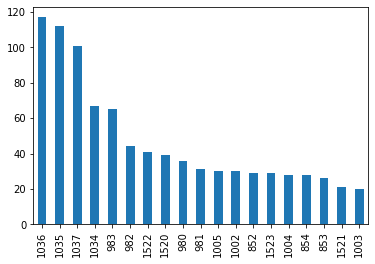

In [65]:
#gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

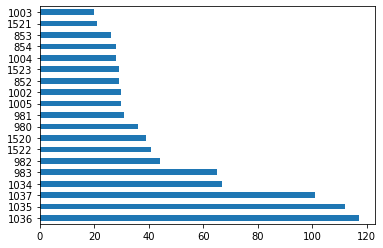

In [66]:
#gráfico de barras horizontais
df["LojaID"].value_counts(ascending=False).plot.barh()

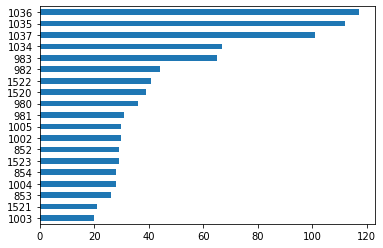

In [68]:
#gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

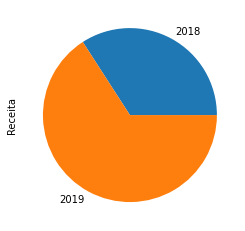

In [70]:
#gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [71]:
#total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

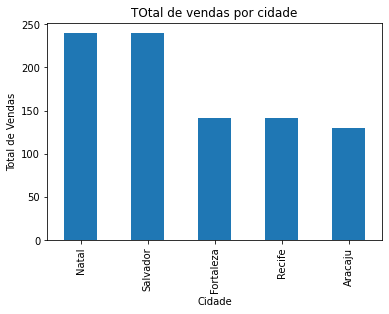

In [72]:
#adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="TOtal de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

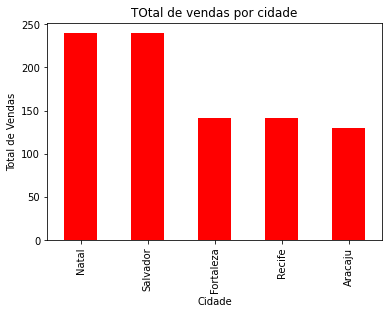

In [73]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="TOtal de vendas por cidade",color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [77]:
#alterando o estilo
plt.style.use("ggplot")

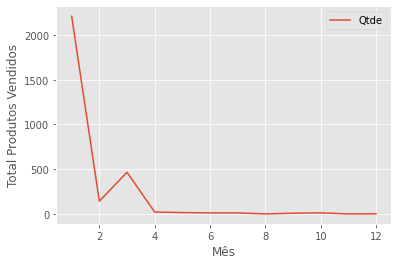

In [76]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [78]:
df.groupby(df['mes_venda'])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [79]:
#selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

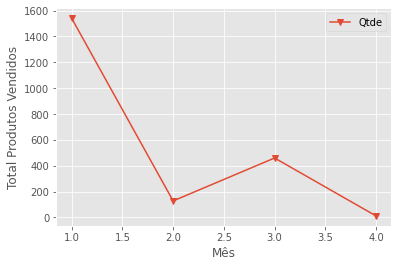

In [80]:
#total de produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

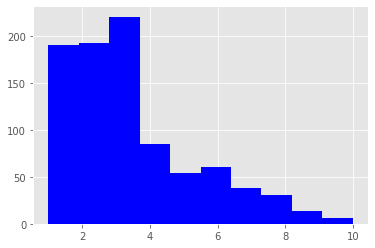

In [83]:
#histograma
plt.hist(df["Qtde"], color="blue");

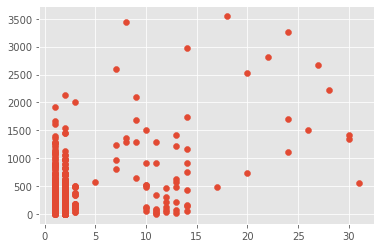

In [82]:
#gráfico do tipo disperção
plt.scatter(x = df_2019["dia_venda"], y = df_2019["Receita"]);

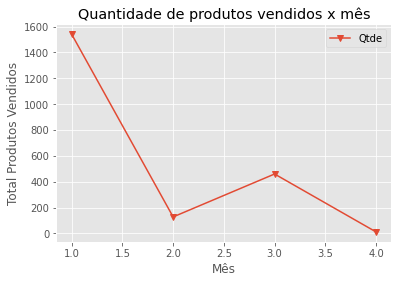

In [84]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend()
plt;plt.savefig("Grafico QTDE x MES.png");